In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Resources_Clean/visualization_protein.csv')

In [4]:
df.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,On,O00391,O00533,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
0,55_0,55,0,10.0,6.0,15.0,0.0,0,11254.3,732430.0,...,365475.0,35528.0,97005.6,23122.5,60912.6,408698.0,0.0,29758.8,23833.7,18953.5
1,55_6,55,6,8.0,10.0,34.0,0.0,0,13163.6,630465.0,...,405676.0,30332.6,109174.0,23499.8,51655.8,369870.0,0.0,22935.2,17722.5,16642.7
2,55_12,55,12,10.0,10.0,41.0,0.0,1,15257.6,815083.0,...,303953.0,43026.2,114921.0,21860.1,61598.2,318553.0,65762.6,29193.4,28536.1,19290.9
3,55_36,55,36,17.0,18.0,51.0,0.0,1,13530.8,753832.0,...,303597.0,48188.4,109794.0,23930.6,70223.5,377550.0,74976.1,31732.6,22186.5,21717.1
4,942_6,942,6,8.0,2.0,21.0,0.0,0,11218.7,399518.0,...,253373.0,27431.8,93796.7,17450.9,21299.1,306621.0,82335.5,24018.7,18939.5,15251.2


In [5]:
df['sum_score'] = df[df.filter(regex = 'updrs').columns].sum(axis = 1)
df.drop(df.filter(regex = 'updrs').columns, axis = 1, inplace = True)

Text(0.5, 0, 'Disease Severity Score')

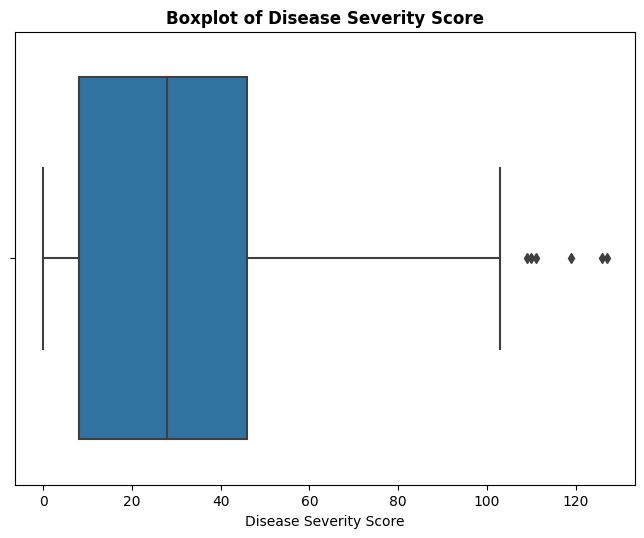

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(8, 6), dpi=100)
plt.title('Boxplot of Disease Severity Score', fontsize='large', fontweight='bold')
sns.boxplot(data = df, x = 'sum_score')
plt.xlabel('Disease Severity Score')

In [6]:
visit_month = df.pivot_table(index = ['visit_month', 'On'], values = ['sum_score'], aggfunc = np.mean).reset_index()

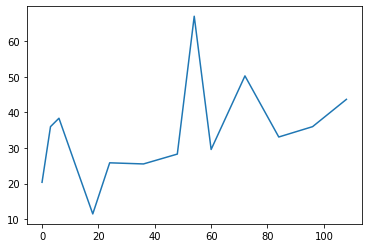

In [8]:
nodrug = visit_month[visit_month['On'] == 0]
plt.plot(nodrug['visit_month'], nodrug['sum_score'])

* There is seasonality in parkinsons as well

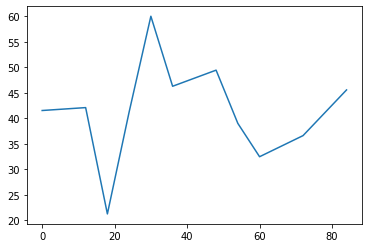

In [9]:
drug = visit_month[visit_month['On'] == 1]
plt.plot(drug['visit_month'], drug['sum_score'])